<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-MBA-em-Ciência-de-Dados" data-toc-modified-id="-MBA-em-Ciência-de-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="blue"> MBA em Ciência de Dados</font></a></span></li><li><span><a href="#Técnicas-Avançadas-para-Captura-e-Tratamento-de-Dados" data-toc-modified-id="Técnicas-Avançadas-para-Captura-e-Tratamento-de-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font></a></span><ul class="toc-item"><li><span><a href="#Avaliação-Final-" data-toc-modified-id="Avaliação-Final--2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><font color="blue">Avaliação Final </font></a></span><ul class="toc-item"><li><span><a href="#Questão-1-(2.5-pontos)" data-toc-modified-id="Questão-1-(2.5-pontos)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Questão 1 (2.5 pontos)</a></span></li><li><span><a href="#Questão-2-(2.5-pontos)" data-toc-modified-id="Questão-2-(2.5-pontos)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Questão 2 (2.5 pontos)</a></span></li><li><span><a href="#Questão-3-(2.5-pontos)" data-toc-modified-id="Questão-3-(2.5-pontos)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Questão 3 (2.5 pontos)</a></span><ul class="toc-item"><li><span><a href="#a)-(1.0-ponto)" data-toc-modified-id="a)-(1.0-ponto)-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>a) (1.0 ponto)</a></span></li><li><span><a href="#c)-(1.5-ponto)" data-toc-modified-id="c)-(1.5-ponto)-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>c) (1.5 ponto)</a></span></li></ul></li><li><span><a href="#Questão-4-(2.5-pontos)" data-toc-modified-id="Questão-4-(2.5-pontos)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Questão 4 (2.5 pontos)</a></span></li></ul></li></ul></li></ul></div>

# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue">Avaliação Final </font> 

**Produzido por Luis Gustavo Nonato e Moacir Ponti**<br>
**Cemeai - ICMC/USP - São Carlos**

---

### Questão 1 (2.5 pontos)
O site:

[https://lite.cnn.com/en/article/h_f2d6a641391976d67a183f746a57d736]('https://lite.cnn.com/en/article/h_f2d6a641391976d67a183f746a57d736')

corresponde a um arquivo html cuja maior parte do conteúdo é uma notícia sobre dinossouros. Faça uma requisição ao site e armazene o conteúdo (arquivo html) em uma string. Imprima quantos caracteres a string possui.

OBS. Você não deve fazer um parser no html, armazene todo o conteúdo com uma string.

In [2]:
import requests as rq

In [3]:
url = 'https://lite.cnn.com/en/article/h_f2d6a641391976d67a183f746a57d736'

req = rq.get(url)

if(req.status_code == 200):
    print(req.status_code, ' Sucesso na requisição!')
    conteudo = req.text
    print('Tipo da variável que armazenou a requisição = ', type(conteudo))
    print('A string retornada do url tem %0.0f caracteres' % len(conteudo))
elif(req.status_code == 404): 
    print(req.status_code, ' Não encontrado')
else:
    print(req.status_code, ' Outro erro')


200  Sucesso na requisição!
Tipo da variável que armazenou a requisição =  <class 'str'>
A string retornada do url tem 8112 caracteres


### Questão 2 (2.5 pontos)

Construa, a partir da string armazenada na questão 1), uma lista de palavras que aparecem no documento html. As palavras da lista devem ser constituídas apenas por letras do alfabeto, possuírem mais que 1 caracter e não serem 'stop words'. Qual a palavra que mais aparece na lista de palavras obtida?

**Dica:** Utilize a biblioteca <font color='blue'>nltk</font> para construir a lista de palavras como descrito acima.

In [45]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.stem import PorterStemmer
import numpy as np


In [5]:
word =  nltk.word_tokenize(conteudo)
print(word[:5],len(word)) #cada elemento da string é um elemento de uma lista

['<', '!', 'DOCTYPE', 'HTML', 'PUBLIC'] 1769


In [6]:
# removendo símbolos e quaisquer elementos que não sejam apresentam elementos do alfabeto
# e removendo elementos com 1 caracter
word = [w.lower() for w in word if w.isalpha() and w not in string.ascii_letters and len(w) != 1]
print(word[:10],len(word))

['doctype', 'html', 'public', 'html', 'html', 'head', 'meta', 'meta', 'viewport', 'link'] 888


In [7]:
# removendo stop-words
stop_words = stopwords.words('english')
word = [w for w in word if w not in stop_words]
print(word[:5], len(word))

['doctype', 'html', 'public', 'html', 'html'] 562


In [8]:
# encontrando bigramas e trigramas
bigram_measures = nltk.collocations.BigramAssocMeasures() 
finder = BigramCollocationFinder.from_words(word)

for i in finder.nbest(bigram_measures.raw_freq,20):
    word.append(i[0].lower()+' '+i[1].lower())
    
print(word[-5:], len(word))


['high metabolic', 'latest news', 'low metabolic', 'metabolic rate', 'question whether'] 582


In [9]:
# encontrando a palavra que mais aparece, sem realizar normalização léxica
dict_count = {}
for i in word:
    x = word.count(i)
    dict_count[i] = x

print('Número de palavras total = ', len(word), '\n')
print('Palavra mais repetida sem normalização léxica é ',max(dict_count, key=dict_count.get),
    'com %0.0f aparições' %(max(dict_count.values())))

Número de palavras total =  582 

Palavra mais repetida sem normalização léxica é  dinosaurs com 19 aparições


In [10]:
# avaliando o resultado com normalização léxica
word_norm = [PorterStemmer().stem(w) for w in word]


dict_norm = {}
i,x = 0,0
for i in word_norm:
    x = word_norm.count(i)
    dict_norm[i] = x

print('Número de palavras total = ', len(word_norm), '\n')
print('Palavra mais repetida sem normalização léxica é ',max(dict_norm, key=dict_norm.get),
    'com %0.0f aparições' %(max(dict_norm.values())))

Número de palavras total =  582 

Palavra mais repetida sem normalização léxica é  dinosaur com 20 aparições


### Questão 3 (2.5 pontos)

Antes de começar, carregue o arquivo `artists_mba22.csv` e armazene em um pandas DataFrame.

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('/Users/jp.ducatti/Documents/mba_data_science_usp/captura_tratamento_dados/avaliacao_final/artists_mba22.csv')
print(df.dtypes)
df.tail(3)

name            object
years           object
genre           object
nationality     object
bio             object
wikipedia       object
paintings      float64
dtype: object


,name,years,genre,nationality,bio,wikipedia,paintings
50,Master of Pedret,1100 – 1130,Romanesque,Spanish,Master of Pedret is the name given by historia...,https://en.wikipedia.org/wiki/Master_of_Pedret,3.0
51,Candido Portinari,1903 – 1962,Neorealism,Brazilian,"Candido Portinari (December 29, 1903 – Februar...",https://en.wikipedia.org/wiki/Candido_Portinari,25.0
52,Mestre Ataíde,1762 – 1830,Baroque,Brazilian,"Manuel da Costa Ataíde, better known as Mestre...",https://en.wikipedia.org/wiki/Manoel_da_Costa_...,29.0


#### a) (1.0 ponto)

Crie dois novos atributos do tipo inteiro no dataframe, chamados `birth` and `death`, com base na coluna `years`

Posteriormente exiba as colunas `name`, `birth`, `death` e `years` das 6 primeiras linhas usando a função `head()`

In [13]:
n_row = df.shape[0] #contando número de linhas para percorrer no for loop

# loop for para gerar listas de birth e death a serem incluidas no dataframe
i = 0
birth = []
death = []
for i in range(0,n_row):
    birth_death = str(df['years'][i])
    birth.append(birth_death[:4])
    death.append(birth_death[-4:])

In [14]:
# inserindo birth e death no dataframe ao lado da coluna years
df.insert(loc = 2, column='birth', value = birth)
df.insert(loc = 3, column='death', value = death)

print(df.dtypes)
df.head(3)

name            object
years           object
birth           object
death           object
genre           object
nationality     object
bio             object
wikipedia       object
paintings      float64
dtype: object


,name,years,birth,death,genre,nationality,bio,wikipedia,paintings
0,Amedeo Modigliani,1884:1920,1884,1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193.0
1,Vasiliy Kandinskiy,1866 to 1944,1866,1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88.0
2,Diego Rivera,1886 - 1957,1886,1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70.0


In [15]:
# convertendo formato das colunas birth e death de object para INT 64
# foi utilizado INT64 por causa da presenca da linha indice 29 onde há null value para coluna years
df[['birth','death']] = df[['birth','death']].astype(float).astype('Int64')
print(df.dtypes)
df[['name','birth','death','years']].head(6)

name            object
years           object
birth            Int64
death            Int64
genre           object
nationality     object
bio             object
wikipedia       object
paintings      float64
dtype: object


,name,birth,death,years
0,Amedeo Modigliani,1884,1920,1884:1920
1,Vasiliy Kandinskiy,1866,1944,1866 to 1944
2,Diego Rivera,1886,1957,1886 - 1957
3,Claude Monet,1840,1926,1840 to 1926
4,Rene Magritte,1898,1967,1898 - 1967
5,Salvador Dali,1904,1989,1904 - 1989


#### c) (1.5 ponto)

Exiba o número de valores faltantes por coluna. Depois trate os valores faltantes da seguinte forma:
1. Preencha com o valor 0 os valores faltantes relativos às colunas do tipo numérico
1. Remova as linhas ainda existentes apos o passo anterior, isso é, com valores faltantes não numéricos

Exiba o total de linhas após o tratamento.

Número de NaN / null values por coluna: 

name           0
years          1
birth          1
death          1
genre          1
nationality    0
bio            0
wikipedia      2
paintings      1
dtype: int64
Total de valores nulos no dataframa (soma de todas colunas):  7


<AxesSubplot:xlabel='index'>

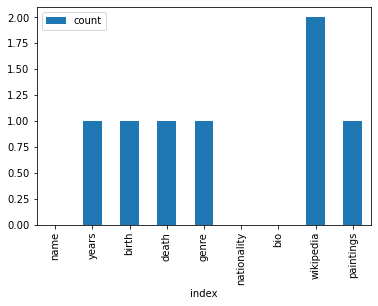

In [26]:
## contando o numéro de null / nan values no dataframe
print('Número de NaN / null values por coluna: \n')
print(df.isna().sum())
print('Total de valores nulos no dataframa (soma de todas colunas): ',df.isna().sum().sum())

df.isna().sum().reset_index(name = 'count').plot.bar(x = 'index', y = 'count')

In [34]:
## index dos valores faltantes segmentado por coluna

for var in df:
    print(var, np.where(df[var].isnull() == True)[0])
             

name []
years [29]
birth [29]
death [29]
genre [49]
nationality []
bio []
wikipedia [26 49]
paintings [20]


In [58]:
# tratamento dos valores faltantes
# se for númerico, preencher com 0; após essa etapa remover linhas com null
# valores numéricos são: float64, int64 or Int64(integer with null values)

#trocando null por 0 em tipo numérico
for var in df:
    if (df[var].dtype.name == 'float64' or df[var].dtype.name == 'int64' or df[var].dtype.name == 'Int64'):
        df[var].fillna(0, inplace = True)

#removendo linhas que continuam com null value
df_clean = df.dropna(how = 'any', axis = 0)

print('Total de linhas antes da remoção  = %0.2f;  e após remoção = %0.2f' % (df.shape[0],df_clean.shape[0]))


Total de linhas antes da remoção  = 53.00;  e após remoção = 50.00


### Questão 4 (2.5 pontos)

Dada uma imagem `query.jpg`  (presente no diretório paintings22) de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares. Para isso utilizaremos uma composição de características:
1. Cor: converta a imagem para um único canal de cor utilizando a fórmula: $I = R\cdot 0.299 + G\cdot0.587 + B\cdot 0.114$, ou seja, para cada pixel RGB vamos obter um único pixel $I$. Depois compute um histograma da imagem resultante com 18 bins, normalizando por meio da divisão pela soma dos valores.
2. Textura: LBP utilizando raio 1.45 e 16 pontos (total 18 características).

Concatene esses dois vetores de características e use-o como descritor de cor e textura da imagem. Faça uma busca no diretório `paintings22`, retornando as 5 imagens mais similares de acordo com esse descritor e a distância L1. Exiba a imagem de consulta e também as 5 imagens retornadas, com seus nomes e valor da distância obtido.

In [17]:
# inclua os pacotes necessários e as funções necessárias

In [18]:
# inclua o código para carregar as imagens, gerar os vetores de características e obter as distâncias

In [19]:
# inclua o código para obter as 5 imagens mais próximas com base nas distâncias computadas e exibi-las